Mutual Information 수업 내용 참고하여 처리해보기 (태양광 생산량과 풍속, 풍향 과의 관계 같은거)
관계가 없다면 과감하게 삭제를 고려

결측값때문에 행의 개수가 달라짐 -> 결측값 처리가 우선시 되어야 함 -> interpolate 를 통해 선형 보간 해줌

In [1]:
import pandas as pd
from datetime import datetime

In [2]:
dangjin_fcst = pd.read_csv('data/dangjin_fcst_data.csv')
dangjin_obs = pd.read_csv('data/dangjin_obs_data.csv')
ulsan_fcst = pd.read_csv('data/ulsan_fcst_data.csv')
ulsan_obs = pd.read_csv('data/ulsan_obs_data.csv')
energy = pd.read_csv('data/energy.csv')
site_info = pd.read_csv('data/site_info.csv')

In [3]:
dangjin_obs[dangjin_obs['전운량(10분위)'].isnull()]

,지점,지점명,일시,기온(°C),풍속(m/s),풍향(16방위),습도(%),전운량(10분위)
0,129,서산,2018-03-01 00:00,3.1,3.6,340.0,96.0,NaN
1,129,서산,2018-03-01 01:00,2.8,0.7,140.0,97.0,NaN
2,129,서산,2018-03-01 02:00,2.6,3.2,320.0,95.0,NaN
3,129,서산,2018-03-01 03:00,2.0,1.9,230.0,97.0,NaN
4,129,서산,2018-03-01 04:00,2.2,2.1,180.0,97.0,NaN
...,...,...,...,...,...,...,...,...
23411,129,서산,2020-10-31 17:00,15.6,1.2,200.0,52.0,NaN
23751,129,서산,2020-11-14 21:00,7.9,0.6,20.0,89.0,NaN
23752,129,서산,2020-11-14 22:00,6.9,0.0,0.0,92.0,NaN
23918,129,서산,2020-11-21 20:00,8.6,0.1,0.0,77.0,NaN


In [4]:
dangjin_obs_df = dangjin_obs.copy()
dnagjin_fcst_df = dangjin_fcst.copy()

In [5]:
dangjin_obs_df[dangjin_obs_df.isnull().any(axis=1)].head(30)

,지점,지점명,일시,기온(°C),풍속(m/s),풍향(16방위),습도(%),전운량(10분위)
0,129,서산,2018-03-01 00:00,3.1,3.6,340.0,96.0,NaN
1,129,서산,2018-03-01 01:00,2.8,0.7,140.0,97.0,NaN
2,129,서산,2018-03-01 02:00,2.6,3.2,320.0,95.0,NaN
3,129,서산,2018-03-01 03:00,2.0,1.9,230.0,97.0,NaN
4,129,서산,2018-03-01 04:00,2.2,2.1,180.0,97.0,NaN
5,129,서산,2018-03-01 05:00,4.1,4.4,270.0,97.0,NaN
6,129,서산,2018-03-01 06:00,3.5,7.9,320.0,93.0,NaN
7,129,서산,2018-03-01 07:00,2.2,6.4,290.0,86.0,NaN
8,129,서산,2018-03-01 08:00,1.0,7.7,320.0,82.0,NaN
9,129,서산,2018-03-01 09:00,0.3,8.9,320.0,71.0,NaN


In [6]:
dangjin_obs_df.describe()

,지점,기온(°C),풍속(m/s),풍향(16방위),습도(%),전운량(10분위)
count,25626.0,25589.000000,25590.000000,25590.000000,25591.000000,21656.000000
mean,129.0,12.947657,1.901407,162.146151,72.926791,5.261636
std,0.0,10.163573,1.544590,133.924277,20.379724,3.805230
min,129.0,-19.300000,0.000000,0.000000,10.000000,0.000000
25%,129.0,4.700000,0.700000,20.000000,57.000000,1.000000
50%,129.0,13.500000,1.500000,180.000000,76.000000,6.000000
75%,129.0,21.500000,2.800000,290.000000,92.000000,9.000000
max,129.0,36.800000,11.700000,360.000000,99.000000,10.000000


In [7]:
dangjin_obs_df.isnull().sum()

지점              0
지점명             0
일시              0
기온(°C)         37
풍속(m/s)        36
풍향(16방위)       36
습도(%)          35
전운량(10분위)    3970
dtype: int64

In [8]:
dangjin_obs_df[dangjin_obs_df['풍속(m/s)'].isnull()]
dangjin_obs_df[10950:11000]

,지점,지점명,일시,기온(°C),풍속(m/s),풍향(16방위),습도(%),전운량(10분위)
10950,129,서산,2019-05-31 12:00,22.2,4.1,230.0,50.0,3.0
10951,129,서산,2019-05-31 13:00,22.1,4.4,230.0,49.0,6.0
10952,129,서산,2019-05-31 14:00,21.0,4.8,250.0,51.0,3.0
10953,129,서산,2019-05-31 15:00,21.8,4.0,230.0,50.0,1.0
10954,129,서산,2019-05-31 16:00,21.1,4.7,230.0,52.0,0.0
10955,129,서산,2019-05-31 17:00,20.4,3.9,230.0,59.0,0.0
10956,129,서산,2019-05-31 18:00,20.2,3.1,230.0,55.0,0.0
10957,129,서산,2019-05-31 19:00,18.4,4.4,230.0,60.0,0.0
10958,129,서산,2019-05-31 20:00,16.8,3.0,250.0,70.0,0.0
10959,129,서산,2019-05-31 21:00,NaN,NaN,NaN,NaN,0.0


In [9]:
# dangjin_obs_df = dangjin_obs_df.fillna(0) # 결측값을 0 으로 수정해줌
# dangjin_obs_df.info()
# ts = dangjin_obs_df['풍속(m/s)'].copy()
# ts_intp_linear = ts.interpolate()  # ts.interpolote() 는 default 가 interpolate(method='values')로 선형으로 비례하여 결측값을 보간해줌
# ts_intp_linear[10950:11000] # 10959~10961, 10964~10972 가 보간해준 결측값 (꽤 자연스러운 값인듯?)

In [10]:
# 결측값 보간 방법 참고 : https://rfriend.tistory.com/264 , https://eda-ai-lab.tistory.com/14
dangjin_obs_df['풍속(m/s)'] = dangjin_obs_df['풍속(m/s)'].interpolate() # 풍속(m/s) 열의 결측값을 보간해줌
dangjin_obs_df[dangjin_obs_df['풍속(m/s)'].isnull()]

,지점,지점명,일시,기온(°C),풍속(m/s),풍향(16방위),습도(%),전운량(10분위)


In [11]:
dangjin_obs_df['기온(°C)'] = dangjin_obs_df['기온(°C)'].interpolate() # 기온(°C) 열의 결측값을 보간해줌
dangjin_obs_df[dangjin_obs_df['기온(°C)'].isnull()]

,지점,지점명,일시,기온(°C),풍속(m/s),풍향(16방위),습도(%),전운량(10분위)


In [12]:
dangjin_obs_df['풍향(16방위)'] = dangjin_obs_df['풍향(16방위)'].interpolate() # 풍향(16방위) 열의 결측값을 보간해줌
dangjin_obs_df[dangjin_obs_df['풍향(16방위)'].isnull()]

,지점,지점명,일시,기온(°C),풍속(m/s),풍향(16방위),습도(%),전운량(10분위)


In [13]:
dangjin_obs_df['습도(%)'] = dangjin_obs_df['습도(%)'].interpolate() # 습도(%) 열의 결측값을 보간해줌
dangjin_obs_df[dangjin_obs_df['습도(%)'].isnull()]

,지점,지점명,일시,기온(°C),풍속(m/s),풍향(16방위),습도(%),전운량(10분위)


In [14]:
dangjin_itp = pd.read_csv('data/석문면_하늘상태_201803_201807.csv')
dangjin_itp['value location:53_114 Start : 20180301 '][:3324]
dangjin_itp[dangjin_itp['value location:53_114 Start : 20180301 '].isnull()]

,format: day,hour,value location:53_114 Start : 20180301
744,Start : 20180401,NaN,NaN
1465,Start : 20180501,NaN,NaN
2210,Start : 20180601,NaN,NaN
2931,Start : 20180701,NaN,NaN


In [15]:
# dangjin_obs_df['전운량(10분위)'] = dangjin_obs_df['전운량(10분위)'].interpolate().copy() # 전운량(10분위) 열의 결측값을 보간해줌
# dangjin_nan = dangjin_obs_df[dangjin_obs_df['전운량(10분위)'].isnull()].copy() # 전운량 은 왜 결측값 보간이 안되는 행이 있지? - 보간에 활용할 이전 데이터가 없어서 보간이 안된듯...
# # 그럼 보간에 활용할 데이터는 어떻게 입력해주지?? -> 석문면_하늘상태_201803_201807.csv 파일의 value 데이터 값을 활용해보자
dangjin_obs_df['전운량(10분위)'][:3324] = dangjin_itp['value location:53_114 Start : 20180301 '][:3324]
dangjin_obs_df['전운량(10분위)'] = dangjin_obs_df['전운량(10분위)'].interpolate() # 석문면_하늘상태_201803_201807.csv 파일에도 결측값이 4개 존재하므로 interpolate 를 통해 결측값을 보간해줌
dangjin_obs_df[dangjin_obs_df['전운량(10분위)'].isnull()]

D:\Python\Anaconda\envs\data_engeneering\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,지점,지점명,일시,기온(°C),풍속(m/s),풍향(16방위),습도(%),전운량(10분위)


In [16]:
dangjin_obs_df.isnull().sum() # 결측값 보간 완료

지점           0
지점명          0
일시           0
기온(°C)       0
풍속(m/s)      0
풍향(16방위)     0
습도(%)        0
전운량(10분위)    0
dtype: int64

In [17]:
dangjin_obs_df.describe()

,지점,기온(°C),풍속(m/s),풍향(16방위),습도(%),전운량(10분위)
count,25626.0,25626.000000,25626.000000,25626.000000,25626.000000,25626.000000
mean,129.0,12.954117,1.901313,162.190744,72.941856,4.927593
std,0.0,10.163744,1.543932,133.866038,20.377559,3.650396
min,129.0,-19.300000,0.000000,0.000000,10.000000,0.000000
25%,129.0,4.700000,0.700000,20.000000,57.925000,1.000000
50%,129.0,13.600000,1.500000,180.000000,76.000000,5.000000
75%,129.0,21.500000,2.800000,290.000000,92.000000,8.000000
max,129.0,36.800000,11.700000,360.000000,99.000000,10.000000


In [18]:
# 0행이 3월 1일 11시에 발표한 15시 예보, 18행이 3월 1일 11시에 발표한 3월 3일 21시 예보
# 태양광 발전량 예측은 1시간 간격으로 해야하지만 예보는 3시간 간격으로 나옴
# Forecast time 은 string
# forecast 는 numpy float64
dangjin_fcst

,Forecast time,forecast,Temperature,Humidity,WindSpeed,WindDirection,Cloud
0,2018-03-01 11:00:00,4.0,0.0,60.0,7.3,309.0,2.0
1,2018-03-01 11:00:00,7.0,-2.0,60.0,7.1,314.0,1.0
2,2018-03-01 11:00:00,10.0,-2.0,60.0,6.7,323.0,1.0
3,2018-03-01 11:00:00,13.0,-2.0,55.0,6.7,336.0,1.0
4,2018-03-01 11:00:00,16.0,-4.0,55.0,5.5,339.0,1.0
...,...,...,...,...,...,...,...
162203,2021-03-01 08:00:00,52.0,7.0,40.0,3.2,187.0,1.0
162204,2021-03-01 08:00:00,55.0,8.0,40.0,4.5,217.0,1.0
162205,2021-03-01 08:00:00,58.0,5.0,55.0,2.2,210.0,1.0
162206,2021-03-01 08:00:00,61.0,1.0,80.0,1.9,164.0,1.0


forecast 데이터에서 Forecast time과 forecast를 조합하여 일시 열과 대칭될 수 있는 데이터를 만들어보자

In [19]:
import re
import pandas as pd

# 에너지의 time 열을 날씨 데이터의 일시 열과 같은 형식으로 변경해줌
def mod_time(dataframe):

    res_df = pd.DataFrame(columns=['mod_time'])
    print(len(dataframe))
    for i in range(len(dataframe)):
        str = dataframe['time'][i]
        AM = re.findall(' [0-9]:[0-9][0-9]:[0-9][0-9]', str)
        PM = re.findall('[0-9][0-9]:[0-9][0-9]:[0-9][0-9]', str)
        
        if not PM:
            str_len = len(AM[0])
            trans_AM = AM[0][:str_len - 3]
            trans_AM = ' ' + trans_AM.replace(' ', '0')
            str = str.replace(AM[0], trans_AM)

        elif not AM:
            str_len = len(str)
            str = str[:str_len - 3]

        temp = pd.DataFrame(data=[str], columns=['mod_time'])
        res_df = res_df.append(temp)

    res_df = res_df.reset_index(drop=True)
    return res_df

# 일시 열에서 계절 추출
def extract_season(dataframe):
    res_df = pd.DataFrame(columns=['season'])
    for i in range(len(dataframe)):
        str = dataframe['일시'][i]
        month = int(str[5:7])
        if month <= 2 or month == 12:   # winter
            temp = pd.DataFrame(data=['winter'], columns=['season'])
        elif month <= 5:  # spring
            temp = pd.DataFrame(data=['spring'], columns=['season'])
        elif month <= 8:  # summer
            temp = pd.DataFrame(data=['summer'], columns=['season'])
        else:
            temp = pd.DataFrame(data=['fall'], columns=['season'])
            
        res_df = res_df.append(temp)
        
    res_df = res_df.reset_index(drop=True)
    return res_df

# 일시 열에서 시 추출
def extract_hour(dataframe):
    res_df = pd.DataFrame(columns=['hour'])
    for i in range(len(dataframe)):
        str = dataframe['일시'][i]
        index = str.find(' ')
        hour = float(str[index+1:index+3])
        temp = pd.DataFrame(data=[hour], columns=['hour'])
        res_df = res_df.append(temp)
    
    res_df = res_df.reset_index(drop=True)
    return res_df

# 일시 열에서 월 추출
def extract_month(dataframe):
    res_df = pd.DataFrame(columns=['month'])
    for i in range(len(dataframe)):
        str = dataframe['일시'][i]
#         index = str.find(' ')
        hour = float(str[5:7])
        temp = pd.DataFrame(data=[month], columns=['month'])
        res_df = res_df.append(temp)
    
    res_df = res_df.reset_index(drop=True)
    return res_df

In [20]:
dangjin_season = extract_season(dangjin_obs_df)

In [21]:
dangjin_season[0::720]

,season
0,spring
720,spring
1440,spring
2160,spring
2880,summer
3600,summer
4320,summer
5040,fall
5760,fall
6480,fall


In [22]:
dangjin_hour = extract_hour(dangjin_obs_df)

In [23]:
dangjin_hour[0::6]

,hour
0,0.0
6,6.0
12,12.0
18,18.0
24,0.0
...,...
25596,18.0
25602,0.0
25608,6.0
25614,12.0


In [24]:
dangjin_obs_df = pd.merge(dangjin_obs_df, dangjin_season, left_index = True, right_index = True)
dangjin_obs_df = pd.merge(dangjin_obs_df, dangjin_hour, left_index = True, right_index = True)

In [25]:
dangjin_obs_df.describe()

,지점,기온(°C),풍속(m/s),풍향(16방위),습도(%),전운량(10분위),hour
count,25626.0,25626.000000,25626.000000,25626.000000,25626.000000,25626.000000,25626.000000
mean,129.0,12.954117,1.901313,162.190744,72.941856,4.927593,11.499532
std,0.0,10.163744,1.543932,133.866038,20.377559,3.650396,6.923015
min,129.0,-19.300000,0.000000,0.000000,10.000000,0.000000,0.000000
25%,129.0,4.700000,0.700000,20.000000,57.925000,1.000000,5.000000
50%,129.0,13.600000,1.500000,180.000000,76.000000,5.000000,11.000000
75%,129.0,21.500000,2.800000,290.000000,92.000000,8.000000,18.000000
max,129.0,36.800000,11.700000,360.000000,99.000000,10.000000,23.000000


In [28]:
energy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25632 entries, 0 to 25631
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   time               25632 non-null  object 
 1   dangjin_floating   25608 non-null  float64
 2   dangjin_warehouse  25584 non-null  float64
 3   dangjin            25632 non-null  int64  
 4   ulsan              25632 non-null  int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 1001.4+ KB


In [29]:
energy.describe()

,dangjin_floating,dangjin_warehouse,dangjin,ulsan
count,25608.000000,25584.000000,25632.000000,25632.000000
mean,122.056311,92.476665,139.653285,64.159761
std,192.041585,146.423366,220.491387,101.020447
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000
75%,191.000000,145.000000,227.000000,101.000000
max,753.000000,593.000000,867.000000,392.000000


In [30]:
energy.head(30)

,time,dangjin_floating,dangjin_warehouse,dangjin,ulsan
0,2018-03-01 1:00:00,0.0,0.0,0,0
1,2018-03-01 2:00:00,0.0,0.0,0,0
2,2018-03-01 3:00:00,0.0,0.0,0,0
3,2018-03-01 4:00:00,0.0,0.0,0,0
4,2018-03-01 5:00:00,0.0,0.0,0,0
5,2018-03-01 6:00:00,0.0,0.0,0,0
6,2018-03-01 7:00:00,0.0,0.0,0,0
7,2018-03-01 8:00:00,0.0,0.0,0,4
8,2018-03-01 9:00:00,36.0,33.0,37,35
9,2018-03-01 10:00:00,313.0,209.0,318,71


In [31]:
energy_df_time = mod_time(energy)

25632


In [32]:
energy_df_time.tail(20)

,mod_time
25612,2021-01-31 05:00
25613,2021-01-31 06:00
25614,2021-01-31 07:00
25615,2021-01-31 08:00
25616,2021-01-31 09:00
25617,2021-01-31 10:00
25618,2021-01-31 11:00
25619,2021-01-31 12:00
25620,2021-01-31 13:00
25621,2021-01-31 14:00


In [34]:
mod_energy_df = energy.join(energy_df_time)
mod_energy_df = mod_energy_df.drop('time', axis=1)

In [35]:
mod_energy_df.tail(50)

,dangjin_floating,dangjin_warehouse,dangjin,ulsan,mod_time
25582,0.0,0.0,0,0,2021-01-29 23:00
25583,0.0,0.0,0,0,2021-01-29 24:00
25584,0.0,0.0,0,0,2021-01-30 01:00
25585,0.0,0.0,0,0,2021-01-30 02:00
25586,0.0,0.0,0,0,2021-01-30 03:00
25587,0.0,0.0,0,0,2021-01-30 04:00
25588,0.0,0.0,0,0,2021-01-30 05:00
25589,0.0,0.0,0,0,2021-01-30 06:00
25590,0.0,0.0,0,0,2021-01-30 07:00
25591,0.0,0.0,0,1,2021-01-30 08:00


In [39]:
# 평균을 넘는 에너지 발생량의 시간대를 알아보자
for i in range(len(energy)):
    if energy['dangjin'][i] > 139:
        print(energy.loc[i]['time'], energy.loc[i]['dangjin'])

2018-03-01 10:00:00 318
2018-03-01 11:00:00 490
2018-03-01 12:00:00 550
2018-03-01 13:00:00 727
2018-03-01 14:00:00 733
2018-03-01 15:00:00 672
2018-03-01 16:00:00 546
2018-03-01 17:00:00 364
2018-03-02 9:00:00 154
2018-03-02 10:00:00 367
2018-03-02 11:00:00 539
2018-03-02 12:00:00 644
2018-03-02 13:00:00 709
2018-03-02 14:00:00 739
2018-03-02 15:00:00 693
2018-03-02 16:00:00 583
2018-03-02 17:00:00 409
2018-03-03 10:00:00 335
2018-03-03 11:00:00 501
2018-03-03 12:00:00 602
2018-03-03 13:00:00 646
2018-03-03 14:00:00 642
2018-03-03 15:00:00 474
2018-03-03 16:00:00 491
2018-03-03 17:00:00 363
2018-03-04 11:00:00 157
2018-03-04 12:00:00 212
2018-03-05 11:00:00 317
2018-03-05 12:00:00 264
2018-03-05 13:00:00 397
2018-03-05 14:00:00 418
2018-03-05 15:00:00 621
2018-03-05 16:00:00 566
2018-03-05 17:00:00 413
2018-03-05 18:00:00 156
2018-03-06 9:00:00 172
2018-03-06 10:00:00 389
2018-03-06 11:00:00 550
2018-03-06 12:00:00 630
2018-03-06 13:00:00 689
2018-03-06 14:00:00 655
2018-03-06 15:00:0

2018-04-28 17:00:00 441
2018-04-28 18:00:00 251
2018-04-29 9:00:00 234
2018-04-29 10:00:00 388
2018-04-29 11:00:00 515
2018-04-29 12:00:00 355
2018-04-29 13:00:00 651
2018-04-29 14:00:00 656
2018-04-29 15:00:00 618
2018-04-29 16:00:00 536
2018-04-29 17:00:00 408
2018-04-29 18:00:00 225
2018-04-30 9:00:00 188
2018-04-30 10:00:00 351
2018-04-30 11:00:00 488
2018-04-30 12:00:00 554
2018-04-30 13:00:00 464
2018-04-30 14:00:00 485
2018-04-30 15:00:00 489
2018-04-30 16:00:00 461
2018-04-30 17:00:00 307
2018-05-01 10:00:00 219
2018-05-01 11:00:00 373
2018-05-01 12:00:00 269
2018-05-01 13:00:00 416
2018-05-01 14:00:00 178
2018-05-01 15:00:00 144
2018-05-01 16:00:00 162
2018-05-02 10:00:00 162
2018-05-02 12:00:00 184
2018-05-02 13:00:00 377
2018-05-03 9:00:00 243
2018-05-03 10:00:00 423
2018-05-03 11:00:00 542
2018-05-03 12:00:00 658
2018-05-03 13:00:00 712
2018-05-03 14:00:00 716
2018-05-03 15:00:00 574
2018-05-03 16:00:00 277
2018-05-03 17:00:00 258
2018-05-04 9:00:00 246
2018-05-04 10:00:00 

2018-06-23 12:00:00 545
2018-06-23 13:00:00 547
2018-06-23 14:00:00 510
2018-06-23 15:00:00 642
2018-06-23 16:00:00 537
2018-06-23 17:00:00 424
2018-06-23 18:00:00 177
2018-06-24 9:00:00 227
2018-06-24 10:00:00 402
2018-06-24 11:00:00 529
2018-06-24 12:00:00 624
2018-06-24 13:00:00 673
2018-06-24 14:00:00 687
2018-06-24 15:00:00 648
2018-06-24 16:00:00 564
2018-06-24 17:00:00 433
2018-06-24 18:00:00 259
2018-06-25 9:00:00 212
2018-06-25 10:00:00 232
2018-06-25 11:00:00 268
2018-06-25 12:00:00 483
2018-06-25 13:00:00 544
2018-06-25 14:00:00 475
2018-06-25 15:00:00 436
2018-06-25 16:00:00 548
2018-06-25 17:00:00 390
2018-06-25 18:00:00 213
2018-06-27 10:00:00 259
2018-06-27 11:00:00 396
2018-06-27 12:00:00 606
2018-06-27 13:00:00 598
2018-06-27 14:00:00 653
2018-06-27 15:00:00 644
2018-06-27 16:00:00 564
2018-06-27 17:00:00 352
2018-06-27 18:00:00 229
2018-06-29 10:00:00 203
2018-06-29 11:00:00 279
2018-06-29 12:00:00 524
2018-06-29 13:00:00 627
2018-06-29 14:00:00 603
2018-06-29 15:00:0

2018-08-16 17:00:00 375
2018-08-16 18:00:00 186
2018-08-17 9:00:00 212
2018-08-17 10:00:00 413
2018-08-17 11:00:00 563
2018-08-17 12:00:00 657
2018-08-17 13:00:00 703
2018-08-17 14:00:00 708
2018-08-17 15:00:00 666
2018-08-17 16:00:00 579
2018-08-17 17:00:00 443
2018-08-17 18:00:00 256
2018-08-18 9:00:00 214
2018-08-18 10:00:00 413
2018-08-18 11:00:00 566
2018-08-18 12:00:00 629
2018-08-18 13:00:00 685
2018-08-18 14:00:00 684
2018-08-18 15:00:00 570
2018-08-18 16:00:00 497
2018-08-18 17:00:00 261
2018-08-18 18:00:00 201
2018-08-19 9:00:00 155
2018-08-19 10:00:00 406
2018-08-19 11:00:00 445
2018-08-19 12:00:00 578
2018-08-19 13:00:00 631
2018-08-19 14:00:00 598
2018-08-19 15:00:00 519
2018-08-19 16:00:00 559
2018-08-19 17:00:00 260
2018-08-20 10:00:00 360
2018-08-20 11:00:00 387
2018-08-20 12:00:00 427
2018-08-20 13:00:00 334
2018-08-20 14:00:00 265
2018-08-20 15:00:00 271
2018-08-20 16:00:00 430
2018-08-20 17:00:00 335
2018-08-21 11:00:00 142
2018-08-21 12:00:00 311
2018-08-21 13:00:00

2018-11-17 14:00:00 267
2018-11-17 15:00:00 140
2018-11-18 10:00:00 196
2018-11-18 11:00:00 273
2018-11-18 12:00:00 410
2018-11-18 13:00:00 222
2018-11-18 14:00:00 267
2018-11-18 15:00:00 394
2018-11-18 16:00:00 261
2018-11-19 10:00:00 288
2018-11-19 11:00:00 470
2018-11-19 12:00:00 557
2018-11-19 13:00:00 515
2018-11-19 14:00:00 430
2018-11-19 16:00:00 195
2018-11-20 9:00:00 143
2018-11-20 10:00:00 357
2018-11-20 11:00:00 522
2018-11-20 12:00:00 618
2018-11-20 13:00:00 655
2018-11-20 14:00:00 632
2018-11-20 15:00:00 542
2018-11-20 16:00:00 323
2018-11-22 9:00:00 173
2018-11-22 10:00:00 392
2018-11-22 11:00:00 550
2018-11-22 12:00:00 646
2018-11-22 13:00:00 691
2018-11-22 14:00:00 631
2018-11-22 15:00:00 158
2018-11-22 16:00:00 250
2018-11-23 10:00:00 362
2018-11-23 11:00:00 536
2018-11-23 12:00:00 636
2018-11-23 13:00:00 674
2018-11-23 14:00:00 551
2018-11-23 15:00:00 454
2018-11-23 16:00:00 278
2018-11-24 11:00:00 391
2018-11-24 12:00:00 521
2018-11-24 13:00:00 555
2018-11-24 14:00:0

2019-02-13 14:00:00 711
2019-02-13 15:00:00 674
2019-02-13 16:00:00 519
2019-02-13 17:00:00 332
2019-02-14 10:00:00 189
2019-02-14 11:00:00 288
2019-02-14 12:00:00 472
2019-02-14 13:00:00 722
2019-02-14 14:00:00 770
2019-02-14 15:00:00 723
2019-02-14 16:00:00 629
2019-02-14 17:00:00 407
2019-02-15 11:00:00 207
2019-02-15 13:00:00 162
2019-02-16 11:00:00 183
2019-02-16 12:00:00 317
2019-02-16 13:00:00 679
2019-02-16 14:00:00 788
2019-02-16 15:00:00 662
2019-02-16 16:00:00 519
2019-02-16 17:00:00 328
2019-02-17 9:00:00 142
2019-02-17 10:00:00 375
2019-02-17 11:00:00 573
2019-02-17 12:00:00 723
2019-02-17 13:00:00 807
2019-02-17 14:00:00 819
2019-02-17 15:00:00 761
2019-02-17 16:00:00 653
2019-02-17 17:00:00 447
2019-02-18 10:00:00 269
2019-02-18 11:00:00 492
2019-02-18 12:00:00 565
2019-02-18 13:00:00 504
2019-02-18 14:00:00 228
2019-02-18 15:00:00 141
2019-02-19 14:00:00 162
2019-02-19 15:00:00 320
2019-02-19 16:00:00 418
2019-02-19 17:00:00 295
2019-02-20 11:00:00 211
2019-02-20 12:00:

2019-04-01 9:00:00 239
2019-04-01 10:00:00 428
2019-04-01 11:00:00 440
2019-04-01 12:00:00 471
2019-04-01 13:00:00 638
2019-04-01 14:00:00 655
2019-04-01 15:00:00 716
2019-04-01 16:00:00 584
2019-04-01 17:00:00 474
2019-04-01 18:00:00 256
2019-04-02 9:00:00 209
2019-04-02 10:00:00 379
2019-04-02 11:00:00 637
2019-04-02 12:00:00 751
2019-04-02 13:00:00 806
2019-04-02 14:00:00 822
2019-04-02 15:00:00 778
2019-04-02 16:00:00 661
2019-04-02 17:00:00 487
2019-04-02 18:00:00 254
2019-04-03 9:00:00 243
2019-04-03 10:00:00 454
2019-04-03 11:00:00 619
2019-04-03 12:00:00 735
2019-04-03 13:00:00 808
2019-04-03 14:00:00 829
2019-04-03 15:00:00 781
2019-04-03 16:00:00 683
2019-04-03 17:00:00 518
2019-04-03 18:00:00 270
2019-04-04 9:00:00 236
2019-04-04 10:00:00 451
2019-04-04 11:00:00 629
2019-04-04 12:00:00 744
2019-04-04 13:00:00 813
2019-04-04 14:00:00 825
2019-04-04 15:00:00 762
2019-04-04 16:00:00 645
2019-04-04 17:00:00 472
2019-04-04 18:00:00 228
2019-04-05 10:00:00 259
2019-04-05 11:00:00 

2019-05-20 12:00:00 753
2019-05-20 13:00:00 820
2019-05-20 14:00:00 825
2019-05-20 15:00:00 776
2019-05-20 16:00:00 667
2019-05-20 17:00:00 519
2019-05-20 18:00:00 318
2019-05-21 9:00:00 268
2019-05-21 10:00:00 482
2019-05-21 11:00:00 630
2019-05-21 12:00:00 731
2019-05-21 13:00:00 775
2019-05-21 14:00:00 780
2019-05-21 15:00:00 738
2019-05-21 16:00:00 644
2019-05-21 17:00:00 484
2019-05-21 18:00:00 276
2019-05-22 9:00:00 264
2019-05-22 10:00:00 465
2019-05-22 11:00:00 606
2019-05-22 12:00:00 710
2019-05-22 13:00:00 756
2019-05-22 14:00:00 755
2019-05-22 15:00:00 700
2019-05-22 16:00:00 607
2019-05-22 17:00:00 455
2019-05-22 18:00:00 217
2019-05-23 9:00:00 261
2019-05-23 10:00:00 453
2019-05-23 11:00:00 591
2019-05-23 12:00:00 681
2019-05-23 13:00:00 726
2019-05-23 14:00:00 730
2019-05-23 15:00:00 693
2019-05-23 16:00:00 603
2019-05-23 17:00:00 453
2019-05-23 18:00:00 277
2019-05-24 9:00:00 245
2019-05-24 10:00:00 429
2019-05-24 11:00:00 555
2019-05-24 12:00:00 641
2019-05-24 13:00:00 

2019-07-01 13:00:00 474
2019-07-01 14:00:00 515
2019-07-01 15:00:00 594
2019-07-01 16:00:00 582
2019-07-01 17:00:00 462
2019-07-01 18:00:00 310
2019-07-02 10:00:00 339
2019-07-02 11:00:00 556
2019-07-02 12:00:00 654
2019-07-02 13:00:00 704
2019-07-02 14:00:00 719
2019-07-02 15:00:00 695
2019-07-02 16:00:00 617
2019-07-02 17:00:00 480
2019-07-02 18:00:00 309
2019-07-03 10:00:00 206
2019-07-03 11:00:00 432
2019-07-03 12:00:00 432
2019-07-03 13:00:00 306
2019-07-03 14:00:00 341
2019-07-03 15:00:00 287
2019-07-03 16:00:00 142
2019-07-03 17:00:00 159
2019-07-04 10:00:00 279
2019-07-04 11:00:00 534
2019-07-04 12:00:00 652
2019-07-04 13:00:00 699
2019-07-04 14:00:00 716
2019-07-04 15:00:00 685
2019-07-04 16:00:00 560
2019-07-04 17:00:00 362
2019-07-04 18:00:00 187
2019-07-05 9:00:00 219
2019-07-05 10:00:00 404
2019-07-05 11:00:00 517
2019-07-05 12:00:00 639
2019-07-05 13:00:00 681
2019-07-05 14:00:00 685
2019-07-05 15:00:00 653
2019-07-05 16:00:00 577
2019-07-05 17:00:00 449
2019-07-05 18:00:

2019-08-20 16:00:00 368
2019-08-20 17:00:00 310
2019-08-20 18:00:00 204
2019-08-21 9:00:00 207
2019-08-21 10:00:00 334
2019-08-21 11:00:00 432
2019-08-21 12:00:00 449
2019-08-21 13:00:00 550
2019-08-21 14:00:00 392
2019-08-21 15:00:00 494
2019-08-21 16:00:00 496
2019-08-21 17:00:00 220
2019-08-22 11:00:00 248
2019-08-22 12:00:00 418
2019-08-22 13:00:00 587
2019-08-22 14:00:00 732
2019-08-22 15:00:00 658
2019-08-22 16:00:00 593
2019-08-22 17:00:00 450
2019-08-22 18:00:00 204
2019-08-23 9:00:00 147
2019-08-23 10:00:00 269
2019-08-23 11:00:00 393
2019-08-23 12:00:00 593
2019-08-23 13:00:00 607
2019-08-23 14:00:00 734
2019-08-23 15:00:00 696
2019-08-23 16:00:00 606
2019-08-23 17:00:00 464
2019-08-23 18:00:00 263
2019-08-24 11:00:00 148
2019-08-24 12:00:00 196
2019-08-24 13:00:00 233
2019-08-24 14:00:00 373
2019-08-24 15:00:00 217
2019-08-24 16:00:00 285
2019-08-24 17:00:00 263
2019-08-24 18:00:00 269
2019-08-25 9:00:00 236
2019-08-25 10:00:00 409
2019-08-25 11:00:00 429
2019-08-25 12:00:00

2019-11-02 11:00:00 244
2019-11-02 12:00:00 256
2019-11-02 13:00:00 258
2019-11-02 14:00:00 159
2019-11-02 15:00:00 179
2019-11-02 16:00:00 204
2019-11-03 10:00:00 264
2019-11-03 11:00:00 442
2019-11-03 12:00:00 525
2019-11-03 13:00:00 550
2019-11-03 14:00:00 523
2019-11-03 15:00:00 390
2019-11-03 16:00:00 174
2019-11-04 9:00:00 156
2019-11-04 10:00:00 331
2019-11-04 11:00:00 464
2019-11-04 12:00:00 544
2019-11-04 13:00:00 571
2019-11-04 14:00:00 537
2019-11-04 15:00:00 474
2019-11-04 16:00:00 359
2019-11-05 10:00:00 144
2019-11-05 11:00:00 302
2019-11-05 12:00:00 532
2019-11-05 13:00:00 574
2019-11-05 14:00:00 555
2019-11-05 15:00:00 494
2019-11-05 16:00:00 380
2019-11-06 9:00:00 154
2019-11-06 10:00:00 329
2019-11-06 11:00:00 454
2019-11-06 12:00:00 516
2019-11-06 13:00:00 485
2019-11-06 14:00:00 354
2019-11-06 15:00:00 246
2019-11-06 16:00:00 238
2019-11-07 10:00:00 291
2019-11-07 11:00:00 436
2019-11-07 12:00:00 537
2019-11-07 13:00:00 574
2019-11-07 14:00:00 563
2019-11-07 15:00:0

2020-01-26 14:00:00 482
2020-01-26 15:00:00 422
2020-01-26 16:00:00 243
2020-01-28 12:00:00 181
2020-01-28 13:00:00 378
2020-01-28 14:00:00 478
2020-01-28 15:00:00 335
2020-01-28 16:00:00 149
2020-01-29 10:00:00 155
2020-01-29 11:00:00 260
2020-01-29 12:00:00 463
2020-01-29 13:00:00 541
2020-01-29 14:00:00 505
2020-01-29 15:00:00 493
2020-01-29 16:00:00 193
2020-01-30 10:00:00 237
2020-01-30 11:00:00 415
2020-01-30 12:00:00 516
2020-01-30 13:00:00 580
2020-01-30 14:00:00 583
2020-01-30 15:00:00 551
2020-01-30 16:00:00 436
2020-01-30 17:00:00 174
2020-01-31 10:00:00 233
2020-01-31 11:00:00 377
2020-01-31 12:00:00 481
2020-01-31 13:00:00 539
2020-01-31 14:00:00 564
2020-01-31 15:00:00 518
2020-01-31 16:00:00 408
2020-01-31 17:00:00 169
2020-02-01 12:00:00 144
2020-02-01 13:00:00 259
2020-02-01 14:00:00 392
2020-02-01 15:00:00 271
2020-02-01 16:00:00 291
2020-02-02 10:00:00 187
2020-02-02 11:00:00 247
2020-02-02 12:00:00 354
2020-02-02 13:00:00 409
2020-02-02 14:00:00 338
2020-02-02 15:00

2020-03-20 10:00:00 338
2020-03-20 11:00:00 480
2020-03-20 12:00:00 586
2020-03-20 13:00:00 642
2020-03-20 14:00:00 651
2020-03-20 15:00:00 618
2020-03-20 16:00:00 535
2020-03-20 17:00:00 381
2020-03-20 18:00:00 168
2020-03-21 11:00:00 448
2020-03-21 12:00:00 521
2020-03-21 13:00:00 527
2020-03-21 14:00:00 432
2020-03-21 15:00:00 470
2020-03-21 16:00:00 339
2020-03-21 17:00:00 204
2020-03-22 9:00:00 167
2020-03-22 10:00:00 357
2020-03-22 11:00:00 511
2020-03-22 12:00:00 611
2020-03-22 13:00:00 660
2020-03-22 14:00:00 668
2020-03-22 15:00:00 635
2020-03-22 16:00:00 552
2020-03-22 17:00:00 418
2020-03-22 18:00:00 207
2020-03-23 9:00:00 159
2020-03-23 10:00:00 334
2020-03-23 11:00:00 488
2020-03-23 12:00:00 596
2020-03-23 13:00:00 648
2020-03-23 14:00:00 652
2020-03-23 15:00:00 621
2020-03-23 16:00:00 538
2020-03-23 17:00:00 381
2020-03-23 18:00:00 175
2020-03-24 9:00:00 160
2020-03-24 10:00:00 331
2020-03-24 11:00:00 471
2020-03-24 12:00:00 574
2020-03-24 13:00:00 623
2020-03-24 14:00:00

2020-05-07 12:00:00 691
2020-05-07 13:00:00 739
2020-05-07 14:00:00 743
2020-05-07 15:00:00 473
2020-05-07 16:00:00 550
2020-05-07 17:00:00 323
2020-05-07 18:00:00 142
2020-05-08 9:00:00 268
2020-05-08 10:00:00 478
2020-05-08 11:00:00 621
2020-05-08 12:00:00 671
2020-05-08 13:00:00 630
2020-05-08 14:00:00 435
2020-05-08 15:00:00 231
2020-05-08 16:00:00 154
2020-05-10 10:00:00 212
2020-05-10 11:00:00 228
2020-05-10 12:00:00 331
2020-05-10 13:00:00 305
2020-05-10 14:00:00 455
2020-05-10 15:00:00 509
2020-05-10 16:00:00 558
2020-05-10 17:00:00 430
2020-05-10 18:00:00 239
2020-05-11 9:00:00 257
2020-05-11 10:00:00 437
2020-05-11 11:00:00 576
2020-05-11 12:00:00 613
2020-05-11 13:00:00 699
2020-05-11 14:00:00 714
2020-05-11 15:00:00 507
2020-05-11 16:00:00 307
2020-05-11 17:00:00 179
2020-05-12 9:00:00 242
2020-05-12 10:00:00 339
2020-05-12 11:00:00 304
2020-05-12 12:00:00 454
2020-05-12 13:00:00 716
2020-05-12 14:00:00 732
2020-05-12 15:00:00 737
2020-05-12 16:00:00 642
2020-05-12 17:00:00

2020-07-05 10:00:00 285
2020-07-05 11:00:00 453
2020-07-05 12:00:00 623
2020-07-05 13:00:00 493
2020-07-05 14:00:00 691
2020-07-05 15:00:00 672
2020-07-05 16:00:00 551
2020-07-05 17:00:00 459
2020-07-05 18:00:00 293
2020-07-06 9:00:00 178
2020-07-06 10:00:00 172
2020-07-08 9:00:00 146
2020-07-08 10:00:00 206
2020-07-08 11:00:00 461
2020-07-08 12:00:00 585
2020-07-08 13:00:00 627
2020-07-08 14:00:00 638
2020-07-08 15:00:00 619
2020-07-08 16:00:00 472
2020-07-08 17:00:00 350
2020-07-08 18:00:00 213
2020-07-09 10:00:00 262
2020-07-09 11:00:00 490
2020-07-09 12:00:00 570
2020-07-09 13:00:00 610
2020-07-09 14:00:00 493
2020-07-09 15:00:00 413
2020-07-09 16:00:00 473
2020-07-09 17:00:00 266
2020-07-09 18:00:00 216
2020-07-10 10:00:00 188
2020-07-10 12:00:00 291
2020-07-10 13:00:00 331
2020-07-10 14:00:00 530
2020-07-10 15:00:00 600
2020-07-10 16:00:00 493
2020-07-10 17:00:00 380
2020-07-11 9:00:00 198
2020-07-11 10:00:00 410
2020-07-11 11:00:00 491
2020-07-11 12:00:00 475
2020-07-11 13:00:00

2020-09-17 16:00:00 189
2020-09-17 17:00:00 149
2020-09-18 10:00:00 436
2020-09-18 11:00:00 589
2020-09-18 12:00:00 697
2020-09-18 13:00:00 750
2020-09-18 14:00:00 749
2020-09-18 15:00:00 703
2020-09-18 16:00:00 597
2020-09-18 17:00:00 421
2020-09-18 18:00:00 183
2020-09-19 9:00:00 159
2020-09-19 10:00:00 342
2020-09-19 11:00:00 241
2020-09-19 12:00:00 427
2020-09-19 13:00:00 611
2020-09-19 14:00:00 687
2020-09-19 15:00:00 680
2020-09-19 16:00:00 588
2020-09-19 17:00:00 427
2020-09-19 18:00:00 189
2020-09-20 9:00:00 222
2020-09-20 10:00:00 418
2020-09-20 11:00:00 579
2020-09-20 12:00:00 681
2020-09-20 13:00:00 727
2020-09-20 14:00:00 726
2020-09-20 15:00:00 665
2020-09-20 16:00:00 588
2020-09-20 17:00:00 427
2020-09-20 18:00:00 189
2020-09-21 9:00:00 172
2020-09-21 10:00:00 287
2020-09-21 11:00:00 413
2020-09-21 12:00:00 710
2020-09-21 13:00:00 608
2020-09-21 14:00:00 658
2020-09-21 15:00:00 670
2020-09-21 16:00:00 545
2020-09-21 17:00:00 320
2020-09-22 9:00:00 236
2020-09-22 10:00:00 

2020-11-11 15:00:00 555
2020-11-11 16:00:00 395
2020-11-12 9:00:00 155
2020-11-12 10:00:00 358
2020-11-12 11:00:00 516
2020-11-12 12:00:00 605
2020-11-12 13:00:00 615
2020-11-12 14:00:00 596
2020-11-12 15:00:00 540
2020-11-12 16:00:00 390
2020-11-13 12:00:00 265
2020-11-13 13:00:00 301
2020-11-13 14:00:00 573
2020-11-13 15:00:00 474
2020-11-13 16:00:00 312
2020-11-14 10:00:00 161
2020-11-14 11:00:00 350
2020-11-14 12:00:00 543
2020-11-14 13:00:00 594
2020-11-14 14:00:00 557
2020-11-14 15:00:00 438
2020-11-15 10:00:00 280
2020-11-15 11:00:00 434
2020-11-15 12:00:00 516
2020-11-15 13:00:00 539
2020-11-15 14:00:00 391
2020-11-15 15:00:00 443
2020-11-15 16:00:00 301
2020-11-16 10:00:00 159
2020-11-16 11:00:00 415
2020-11-16 12:00:00 509
2020-11-16 13:00:00 542
2020-11-16 14:00:00 498
2020-11-16 15:00:00 424
2020-11-16 16:00:00 267
2020-11-17 10:00:00 150
2020-11-17 12:00:00 272
2020-11-17 13:00:00 223
2020-11-21 10:00:00 211
2020-11-21 11:00:00 399
2020-11-21 12:00:00 473
2020-11-21 13:00:

2021-01-31 11:00:00 421
2021-01-31 12:00:00 587
2021-01-31 13:00:00 608
2021-01-31 14:00:00 468
2021-01-31 15:00:00 352
2021-01-31 16:00:00 261


보통 에너지가 발생하는 시간은 8~17시
평균을 넘는 에너지가 발생하는 시간 : 여름 - 9~18시 ,겨울 - 10~16시

In [40]:
# 평균을 넘지 않는 에너지 발생량의 날짜, 시간대와 습도, 전운량의 관계를 알아보자
# 운량 -> 맑음(0~2), 구름조금(3~5), 구름많음(6~8), 흐림(9~10이상)
# 운량은 0.0 ~ 10.0으로 표현되며 강수현상이나 강수유무와 관계없이 하루 평균 구름의 양입니다.

In [42]:
# 당진 날씨 데이터와 당진 에너지 생산량 데이터를 합병함
dangjin_energy_df = pd.merge(dangjin_obs_df, energy, left_index = True, right_index = True)
dangjin_energy_df.head(50)

,지점,지점명,일시,기온(°C),풍속(m/s),풍향(16방위),습도(%),전운량(10분위),season,hour,time,dangjin_floating,dangjin_warehouse,dangjin,ulsan
0,129,서산,2018-03-01 00:00,3.1,3.6,340.0,96.0,1.0,spring,0.0,2018-03-01 1:00:00,0.0,0.0,0,0
1,129,서산,2018-03-01 01:00,2.8,0.7,140.0,97.0,3.0,spring,1.0,2018-03-01 2:00:00,0.0,0.0,0,0
2,129,서산,2018-03-01 02:00,2.6,3.2,320.0,95.0,2.0,spring,2.0,2018-03-01 3:00:00,0.0,0.0,0,0
3,129,서산,2018-03-01 03:00,2.0,1.9,230.0,97.0,1.0,spring,3.0,2018-03-01 4:00:00,0.0,0.0,0,0
4,129,서산,2018-03-01 04:00,2.2,2.1,180.0,97.0,1.0,spring,4.0,2018-03-01 5:00:00,0.0,0.0,0,0
5,129,서산,2018-03-01 05:00,4.1,4.4,270.0,97.0,1.0,spring,5.0,2018-03-01 6:00:00,0.0,0.0,0,0
6,129,서산,2018-03-01 06:00,3.5,7.9,320.0,93.0,1.0,spring,6.0,2018-03-01 7:00:00,0.0,0.0,0,0
7,129,서산,2018-03-01 07:00,2.2,6.4,290.0,86.0,1.0,spring,7.0,2018-03-01 8:00:00,0.0,0.0,0,4
8,129,서산,2018-03-01 08:00,1.0,7.7,320.0,82.0,2.0,spring,8.0,2018-03-01 9:00:00,36.0,33.0,37,35
9,129,서산,2018-03-01 09:00,0.3,8.9,320.0,71.0,1.0,spring,9.0,2018-03-01 10:00:00,313.0,209.0,318,71


In [43]:
# 조건과 일치하는 행 출력하기
dangjin_energy_df.loc[dangjin_energy_df['season']=='summer']
dangjin_energy_df.loc[dangjin_energy_df['dangjin'] > 0]

,지점,지점명,일시,기온(°C),풍속(m/s),풍향(16방위),습도(%),전운량(10분위),season,hour,time,dangjin_floating,dangjin_warehouse,dangjin,ulsan
8,129,서산,2018-03-01 08:00,1.0,7.7,320.0,82.0,2.0,spring,8.0,2018-03-01 9:00:00,36.0,33.0,37,35
9,129,서산,2018-03-01 09:00,0.3,8.9,320.0,71.0,1.0,spring,9.0,2018-03-01 10:00:00,313.0,209.0,318,71
10,129,서산,2018-03-01 10:00,0.6,7.9,320.0,63.0,2.0,spring,10.0,2018-03-01 11:00:00,532.0,296.0,490,82
11,129,서산,2018-03-01 11:00,0.5,9.1,320.0,58.0,3.0,spring,11.0,2018-03-01 12:00:00,607.0,315.0,550,334
12,129,서산,2018-03-01 12:00,0.7,6.7,320.0,60.0,4.0,spring,12.0,2018-03-01 13:00:00,614.0,474.0,727,372
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25620,129,서산,2021-01-31 18:00,7.8,2.0,200.0,70.0,8.0,winter,18.0,2021-01-31 13:00:00,487.0,392.0,608,303
25621,129,서산,2021-01-31 19:00,6.7,1.5,200.0,75.0,8.0,winter,19.0,2021-01-31 14:00:00,397.0,261.0,468,294
25622,129,서산,2021-01-31 20:00,6.2,0.8,200.0,77.0,8.0,winter,20.0,2021-01-31 15:00:00,297.0,256.0,352,259
25623,129,서산,2021-01-31 21:00,5.3,0.7,230.0,82.0,8.0,winter,21.0,2021-01-31 16:00:00,230.0,166.0,261,196


In [44]:
import platform
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

Text(0, 0.5, 'dangjin energy generat')

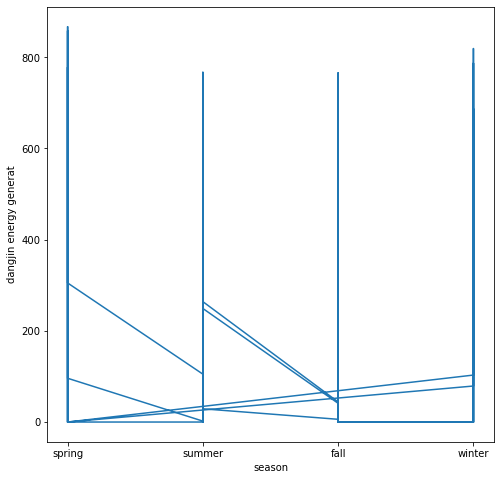

In [45]:
plt.figure(figsize=(8,8))
# plt.scatter(dangjin_energy_df['season'], dangjin_energy_df['dangjin'], s=50)
plt.plot(dangjin_energy_df['season'], dangjin_energy_df['dangjin'])
plt.xlabel('season')
plt.ylabel('dangjin energy generat')
# 계절별로 발생량을 비교하려면 누적값으로 계산해야 할듯

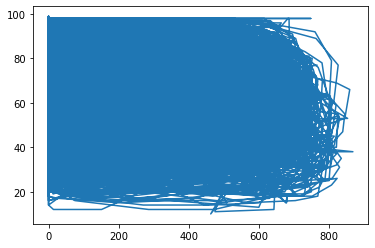

In [46]:
dangjin_energy_mean = dangjin_energy_df['dangjin'].mean()
dangjin_energy_std = dangjin_energy_df['dangjin'].std()
my_dangjin_energy = round((dangjin_energy_df['dangjin'] - dangjin_energy_mean) / dangjin_energy_std, 3)
plt.plot(dangjin_energy_df['dangjin'], dangjin_energy_df['습도(%)'])

일시를 하루 시간대로만 만들어보는건?

In [47]:
X = dangjin_obs_df.copy()
# Label encoding for categoricals
for colname in X.select_dtypes("object"):
    X[colname], _ = X[colname].factorize()

# All discrete features should now have integer dtypes (double-check this before using MI!)
discrete_features = X.dtypes == int
temp = dangjin_energy_df.copy()
y = temp.pop('dangjin')
discrete_features

지점           False
지점명          False
일시           False
기온(°C)       False
풍속(m/s)      False
풍향(16방위)     False
습도(%)        False
전운량(10분위)    False
season       False
hour         False
dtype: bool

In [48]:
from sklearn.feature_selection import mutual_info_regression
def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

In [49]:
mi_scores = make_mi_scores(X, y, discrete_features)
mi_scores
# hour         0.550746
# 일시           0.316433
# 습도(%)        0.090504
# 기온(°C)       0.048372
# 풍향(16방위)     0.038848
# 풍속(m/s)      0.037924
# 전운량(10분위)    0.027387
# season       0.014953
# 지점           0.002451
# 지점명          0.000000
# Name: MI Scores, dtype: float64
# 당진의 에너지 발생량과의 Mutual Information 점수가 가장 높은 것은 hour과 일시로 나타났다
# 의외로 태양광 발전량에는 기온보다 습도의 영향이 더 큰 것 같다
# 많은 결측값을 0으로 처리해준 전운량은 적절한 결측값 처리 후에 다시 관계를 확인해봐야 할 것 같다.

# 결측값을 선형 비례 보간해주었지만 큰 변동은 없었다... (0.027 -> 0.03)

hour         0.549253
일시           0.317449
습도(%)        0.102586
기온(°C)       0.047052
풍속(m/s)      0.042816
풍향(16방위)     0.042263
전운량(10분위)    0.035229
season       0.012927
지점           0.000000
지점명          0.000000
Name: MI Scores, dtype: float64

In [ ]:
# https://www.tensorflow.org/tutorials/structured_data/time_series 따라해보기
# df = dangjin_energy_df[8::24]
df1 = dangjin_obs_df[8:3510:24]
df1 = df1.append(dangjin_obs_df[3506::24]).reset_index(drop=True)
df2 = energy_df[8::24].reset_index(drop=True)

In [ ]:
df = pd.merge(df1, df2, left_index = True, right_index = True)

In [ ]:
df1

In [ ]:
df2

In [ ]:
df
# df1 과 df2 는 1068 행이 있는데... df는 146 행?
# 왜 정상적으로 합병이 안되는거지?? 
# -> merge를 할 때 index 값을 기준으로 하기 때문에 기본값 how='inner'인 경우에는 index 값이 같은 행만 합병함
# -> how='outer'인 경우에는 index 값이 다르더라도 합병하지만 index 값이 다른 행의 개수만큼 전체 행이 늘어나고 해당 index 행에 값이 없으면 NaN으로 처리됨

In [ ]:
# date time 사용법
date_time = pd.to_datetime(df.pop('일시'), format='%Y-%m-%d %H:%M')

In [ ]:
for key, value in date_time.items():
    print(key, value)
#     if value == '01:00':
#         print(key)
# dangjin_obs_data 의 일시 2018-7-24 11:00 ~ 16:00 행이 없어서 6시간이 밀림 -> 6시간 공백을 생략해줌
# 그런데 energy 는 정상적으로 행이 존재하여 오히려 energy 데이터가 6시간이 당겨져버림... 
# -> 기존에는 합병한 데이터를 사용했는데 dangjin_obs_data와 energy의 행이 서로 대응되지 않으므로 별개로 처리한 후 합병해줌
        
# dangjin_energy_df.loc[dangjin_energy_df['일시'] == '%Y-%m-%d %H:%M']
# dangjin_energy_df.head()

In [ ]:
plt.figure(figsize=(20,20))
plot_cols = ['기온(°C)', '습도(%)', 'dangjin']

# 전체 시간
plot_features = df[plot_cols]
plot_features.index = date_time
_ = plot_features.plot(subplots=True)

# 1년간
plot_features = df[plot_cols][:360]
plot_features.index = date_time[:360]
_ = plot_features.plot(subplots=True)

In [ ]:
# season 열의 문자열로 표현된 계절들을 숫자로 바꿔줌
# https://www.datacamp.com/community/tutorials/categorical-data 참고
replace_map = {'season' : {'spring' : 1, 'summer' : 2, 'fall' : 3, 'winter' : 4}}
labels = df1['season'].astype('category').cat.categories.tolist()
df1_season_replace = df1.copy()
df1.replace(replace_map, inplace=True)

In [ ]:
df1